In [31]:
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
from sklearn.linear_model import LinearRegression
import seaborn as sns


In [32]:
# import in csv and name columns

# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - percentage of lower status of the population
# MEDV - Median value of owner-occupied homes in $10000's

In [33]:
file = '/Users/niciat/Downloads/bost_housing_augmented.csv'
boston_data = pd.read_csv(file)
boston_data.head()

,OBS.,TOWN,TOWN#,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,...,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,Nahant,0,2011,-70.955,42.2550,24.0,24.0,0.00632,18.0,...,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,Swampscott,1,2021,-70.950,42.2875,21.6,21.6,0.02731,0.0,...,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,3,Swampscott,1,2022,-70.936,42.2830,34.7,34.7,0.02729,0.0,...,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,4,Marblehead,2,2031,-70.928,42.2930,33.4,33.4,0.03237,0.0,...,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,5,Marblehead,2,2032,-70.922,42.2980,36.2,36.2,0.06905,0.0,...,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [34]:
# Keep town nnumber for classification
# Lat and long is pretty similar
print(boston_data.keys())

Index(['OBS.', 'TOWN', 'TOWN#', 'TRACT', 'LON', 'LAT', 'MEDV', 'CMEDV', 'CRIM',
       'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [35]:
boston_df = boston_data.drop(['OBS.', 'TOWN#'],axis=1)
boston_df.head()
# Should I drop all the rows im not comparing?
# Only one way to find out 


,TOWN,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,2011,-70.955,42.2550,24.0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,2021,-70.950,42.2875,21.6,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,2022,-70.936,42.2830,34.7,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,2031,-70.928,42.2930,33.4,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,2032,-70.922,42.2980,36.2,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [36]:
#boston_df.isnull().sum()

In [37]:
#boston_df.info()

In [38]:
#boston_df.describe()

In [40]:
# Drop Values not related to first question. Question: How does the Median Value of the homes relate to  how many rooms... This is a boring question. 
#---X = boston_df.drop(['TAX','TOWN','TRACT','CMEDV','ZN','CHAS', 'NOX', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT' ], axis=1)
#---y = boston_df['MEDV'].values
#---X = pd.DataFrame(X)
#---X

In [114]:
X =  boston_df.drop(['MEDV','TOWN','TRACT','CMEDV','ZN','CHAS', 'DIS', 'PTRATIO', 'B' , 'RM', 'LAT', 'LON', "LSTAT", 'CRIM' ], axis=1)
X.head()
# Purposley excluding NOX, Indus, Tax
# The dependent variable is "TAX"
#Hypothesis: If Indus inceases and nox decreases tax will rise. << Is that a good statement? Im not 100% sure its correct.
# Do I need Latitude and longitude? 
#CRIME AND INDUS


,INDUS,NOX,AGE,RAD,TAX
0,2.31,0.538,65.2,1,296
1,7.07,0.469,78.9,2,242
2,7.07,0.469,61.1,2,242
3,2.18,0.458,45.8,3,222
4,2.18,0.458,54.2,3,222


<AxesSubplot:>

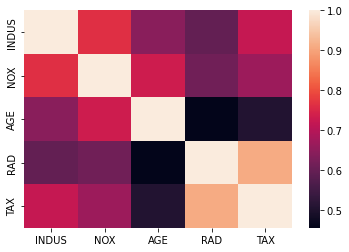

In [115]:
sns.heatmap(X.corr())
# Nox and Indus have the strongest relationship. 

#Accesibility of highways RAD and TAX have the strongest correlation = 0.9
# Nox and indus have the second highest correlation coming in at 0.8
# Third would be nox and age

In [53]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(X,y, test_size=0.35, random_state=40)

In [51]:
# Train the model on the training set
ml=LinearRegression()
ml.fit(x_train,y_train)
# There are some repeating numbers down there .. hm.. 


LinearRegression()

In [54]:
# Predict the test set results 
y_pred=ml.predict(x_test)
print(y_pred)

[666. 329. 233. 666. 666. 666. 313. 437. 403. 666. 223. 307. 666. 666.
 337. 403. 296. 666. 666. 666. 264. 666. 244. 281. 307. 330. 305. 437.
 437. 311. 287. 243. 296. 315. 666. 233. 233. 666. 264. 307. 284. 666.
 432. 304. 403. 666. 307. 265. 666. 264. 437. 311. 304. 666. 666. 403.
 403. 307. 398. 403. 233. 666. 254. 391. 296. 384. 437. 222. 666. 666.
 307. 223. 666. 222. 329. 188. 666. 287. 307. 422. 666. 277. 666. 666.
 666. 666. 391. 384. 666. 666. 264. 403. 304. 666. 432. 666. 666. 276.
 304. 391. 666. 469. 277. 666. 285. 224. 296. 358. 430. 666. 330. 255.
 247. 403. 224. 403. 224. 403. 224. 666. 311. 307. 187. 666. 264. 666.
 666. 193. 666. 329. 437. 293. 337. 279. 264. 307. 666. 304. 666. 307.
 188. 403. 403. 403. 666. 296. 403. 277. 437. 216. 254. 307. 284. 666.
 666. 345. 233. 666. 666. 398. 437. 284. 666. 293. 224. 307. 666. 391.
 287. 307. 398. 666. 300. 245. 666. 666. 329. 666.]


In [44]:
ml.predict([[]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Found array with 0 feature(s) (shape=(1, 0)) while a minimum of 1 is required.